In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import HDBSCAN
import numpy as np
import seaborn as sns
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')

In [7]:
df = pd.read_parquet('../data/main_cluster.parquet')
df.shape

(1322, 9)

In [8]:
df['asking_price'] = df.asking_price / df.suite_area

In [9]:
df = df.dropna(
	subset=['latitude', 'longitude']
)
df.shape

(1322, 9)

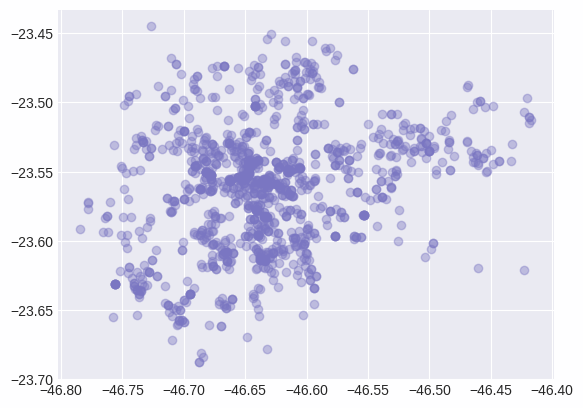

In [10]:
plt.scatter(df.longitude, df.latitude, alpha=0.4);

In [47]:
hdb = HDBSCAN(cluster_selection_epsilon=0.005).fit(df[['longitude', 'latitude']])

df['cluster'] = hdb.labels_

n_clusters_ = len(set(df['cluster'])) - (1 if -1 in df['cluster'] else 0)
n_noise_ = list(df['cluster']).count(-1)

print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')

Estimated number of clusters: 56
Estimated number of noise points: 262


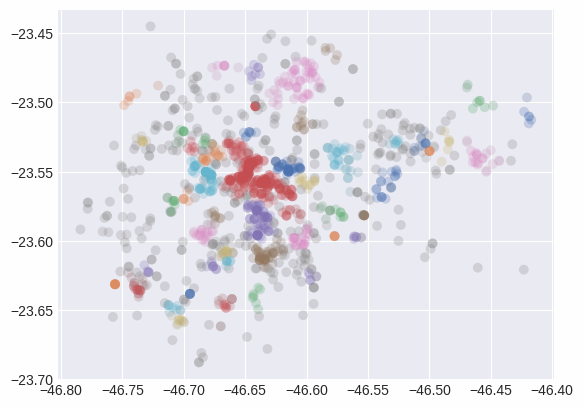

In [48]:
color_palette = sns.color_palette('deep', n_clusters_)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in hdb.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, hdb.probabilities_)]
plt.scatter(x=df.longitude, y=df.latitude, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

<Axes: xlabel='cluster', ylabel='asking_price'>

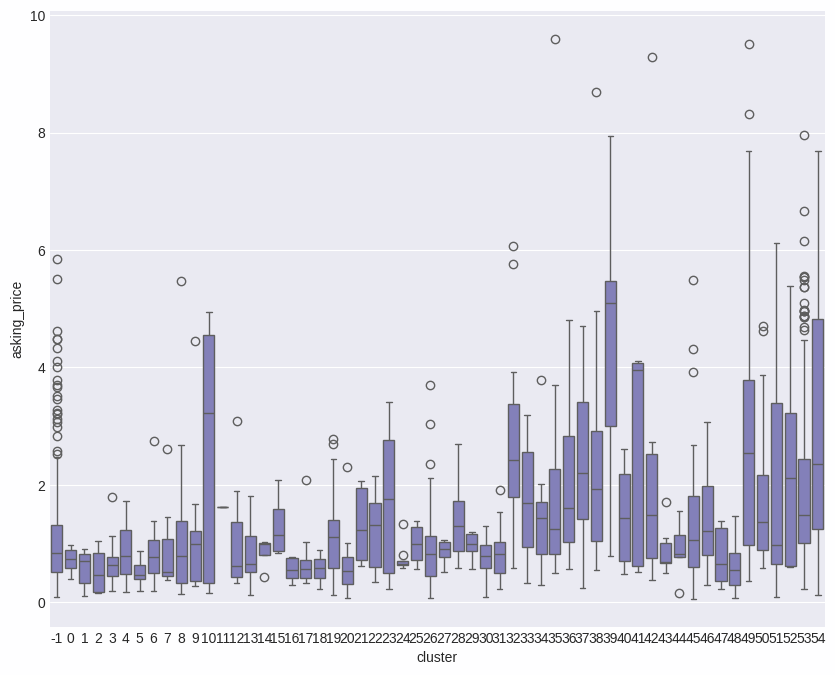

In [49]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 8))

sns.boxplot(x='cluster', y='asking_price', data=df)

In [50]:
df.describe()

,suite_area,condominium,tax,asking_price,latitude,longitude,cluster
count,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000,1322.000000
mean,52.180030,536.024962,85.674735,1.581862,-23.561522,-46.633567,30.003026
std,31.581877,452.290981,153.998855,1.433958,0.042973,0.063802,21.542205
min,12.000000,0.000000,0.000000,0.060304,-23.688078,-46.784212,-1.000000
25%,32.000000,269.250000,0.000000,0.636226,-23.593103,-46.674376,7.000000
50%,45.000000,471.000000,43.500000,1.100964,-23.556564,-46.639969,34.000000
75%,62.000000,707.750000,109.750000,1.952360,-23.535711,-46.606290,53.000000
max,342.000000,4800.000000,2250.000000,9.602195,-23.444893,-46.416988,54.000000
